In [10]:
from sklearn.model_selection import KFold

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sn
import statistics as stat
from sklearn import svm
from sklearn import metrics
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn import preprocessing

In [2]:
df = pd.read_csv('Property_Valuation_and_Assessment_Data.csv')
len(df)
remove_n = 9844857
drop_indices = np.random.choice(df.index, remove_n, replace=False)
df_subset = df.drop(drop_indices)
len(df_subset)

df_subset.replace([np.inf, -np.inf], np.nan, inplace=True)
df_subset.fillna(1, inplace=True)

In [2]:
from sklearnex import patch_sklearn

In [3]:
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


1000

<AxesSubplot:>

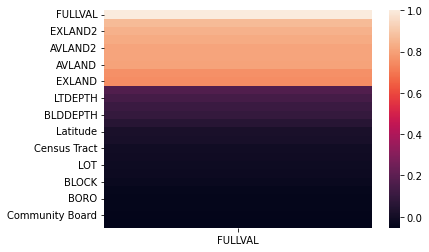

In [5]:
sn.heatmap(df.corr()[['FULLVAL']].sort_values(by='FULLVAL', ascending=False))

In [14]:
df_subset_biggest = pd.read_csv('NYC_DF_BIG.csv')
features = ['EXLAND2','AVLAND2','AVLAND','EXLAND']
X = df_subset_biggest.loc[:, features]
y = df_subset_biggest.loc[:, ['FULLVAL']]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=973, test_size=0.2)

In [11]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 973)
for train_index, test_index in kf.split(X, y):
    #print(train_index, test_index) 
    X_train, X_test= X.iloc[train_index], X.iloc[test_index]
    y_train, y_test= y.iloc[train_index], y.iloc[test_index]

In [5]:
len(X_train)

8000

In [5]:
len(X_test)

2000

In [26]:
df = df.reset_index()

In [6]:
import time
from humanfriendly import format_timespan

# SVM Testing:

In [ ]:
start = time.time()


svmmodel = svm.SVC(kernel='linear')
svmmodel.fit(X_train, y_train)
Ypredictsvm=svmmodel.predict(X_test)
#accuracy=metrics.accuracy_score(y_test, Ypredictsvm)
#print("svm error:", 1-accuracy)
#print(Ypredictsvm)

end = time.time()
format_timespan(end - start)

In [6]:
from sklearn import preprocessing

In [7]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test, Ypredictsvm)#K Fold

In [8]:
r2_score(y_test, Ypredictsvm)# Train Test Split

0.5072212585768986

In [9]:
accuracy=metrics.accuracy_score(y_test, Ypredictsvm)
print("svm error:", 1-accuracy)

svm error: 0.995


In [10]:
from sklearn.metrics import mean_squared_error

In [12]:
mean_squared_error(y_test, Ypredictsvm, squared=False)

7381891.210722251

In [13]:
svmmodel.score(X_test,y_test)

0.005

In [8]:
r2_score(y_test, Ypredictsvm)# Train Test Split small

0.461548531358552

In [13]:
r2_score(y_test, Ypredictsvm)#K Fold Spliot small

-7.4634166801077

In [ ]:
r2_score(y_test, Ypredictsvm)# Train Test Split medium

In [ ]:
r2_score(y_test, Ypredictsvm)#K Fold Spliot medium